# Outliers en 1 dimensión
Si analizáramos una sola variable, por ejemplo “edad”, veremos donde se concentran la mayoría de muestras y los posibles valores “extremos”. Pasemos a un ejemplo en Python!

En azul los valores donde se concentra la mayoría de nuestras filas. En rojo un outlier, ó “valor extremo”.
En el código, importamos librerías, creamos un array de edades con Numpy y luego contabilizamos las ocurrencias.

Al graficar vemos donde se concentran la mayoría de edades, entre 20 y 35 años. Y una muestra aislada con valor 80.

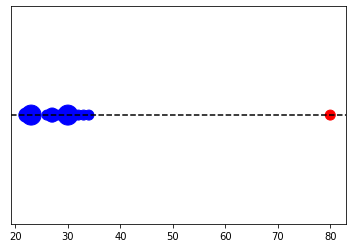

In [1]:
import matplotlib.pyplot as plt    #Libreria para el manejo de graficos
import numpy as np                 #libreria para el manejo de array

#Array de datos de edades
edades = np.array([22,22,23,23,23,23,26,27,27,28,30,30,30,30,31,32,33,34,80])
#Me muestra el array sin datos repetidos y la cantidad que hay por cada uno de ellos
edad_unique, counts = np.unique(edades, return_counts=True)

#print(edad_unique)[22 23 26 27 28 30 31 32 33 34 80]
#print(counts)[2 4 1 2 1 4 1 1 1 1 1]

sizes = counts*100
#print(sizes)[200 400 100 200 100 400 100 100 100 100 100]
colors = ['blue']*len(edad_unique)
#print(colors)
colors[-1] = 'red'
#print(colors[-1])
plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

# Outliers en 2 Dimensiones
Ahora supongamos que tenemos 2 variables: edad e ingresos. Hagamos una gráfica en 2D. Además, usaremos una fórmula para trazar un círculo que delimitará los valores outliers: Los valores que superen el valor de la “media más 2 desvíos estándar” (el área del círculo) quedarán en rojo.

Dentro del circulo azul, los valores que están en la media y en rojo los outliers: 3 valores que superan en más de 2 veces el desvío estándar.
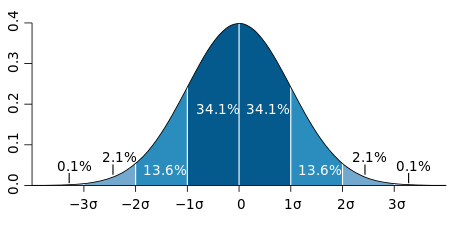



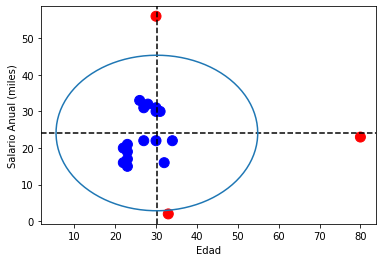

In [2]:
from math import pi     #Libreria para el manejo de una constante matematica

#Array de datos para salarios anuales
salario_anual_miles = np.array([16,20,15,21,19,17,33,22,31,32,56,30,22,31,30,16,2,22,23])
#Media para Array de datos para salarios anuales
media = (salario_anual_miles).mean()
#print(media)
std_x = (salario_anual_miles).std()*2
#print(std_x)
media_y = (edades).mean()
#print(media_y)
std_y = (edades).std()*2
#print(std_y)

#En este caso que la diferencia entre el dato y la media de conjunto 
#es mayor a la desviacion estandar esto seria outlier y serian de color rojo
colors = ['blue']*len(salario_anual_miles)
for index, x in enumerate(salario_anual_miles):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(edades):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
 
plt.scatter(edades, salario_anual_miles, s=100, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')
 
v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
 
t = np.linspace(0, 2*pi, 200)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('Edad')
plt.ylabel('Salario Anual (miles)')
plt.show()

# Visualizar Outliers en 3D

Vamos viendo que algunas de las muestras del dataset inicial van quedando fuera!

¿Qué pasa si añadimos una 3ra dimensión nuestro dataset? Por ejemplo, la dimensión de “compras por mes” de cada usuario.

Vemos en 3 dimensiones que hay valores que escapan a la <<distribución normal>>. Valores atípicos en rojo.
En el caso de las compras mensuales, vemos que aparece un nuevo “punto rojo” en el eje Z. Debemos pensar si es un usuario que queremos descartar ó que por el contrario, nos interesa analizar.

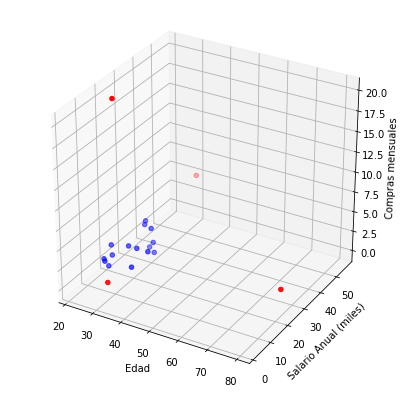

In [3]:
from mpl_toolkits.mplot3d import Axes3D  #libreria para manejo de graficos 3D
fig = plt.figure(figsize=(7,7))          #Tamaño de la figura
ax = fig.gca(projection='3d')            #Proyeccion de grafico 3D

#Array de compras por mes
compras_mes = np.array([1,2,1,20,1,0,3,2,3,0,5,3,2,1,0,1,2,2,2])

#Media y desviasion estandar de compras por mes
media_z = (compras_mes).mean()
std_z = (compras_mes).std()*2

#Se pintan los outlier de compras por mes
for index, x in enumerate(compras_mes):
    if abs(x-media_z) > std_z:
        colors[index] = 'red'

#por ultimo el grafico
ax.scatter(edades, salario_anual_miles, compras_mes, s=20, c=colors)
plt.xlabel('Edad')
plt.ylabel('Salario Anual (miles)')
ax.set_zlabel('Compras mensuales')

plt.show()


# Una gráfica de detección sencilla: Boxplots
Una gráfica bastante interesante de conocer es la de los Boxplots, muy utilizados en el mundo financiero. En nuestro caso, podemos visualizar las variables y en esa “cajita” veremos donde se concentra el 50 por ciento de nuestra distribución (percentiles 25 a 75), los valores mínimos y máximos (las rayas en “T”) y -por supuesto- los outliers, esos “valores extraños” y alejados.

Ese diamante verde está muy alejado de nuestra media!

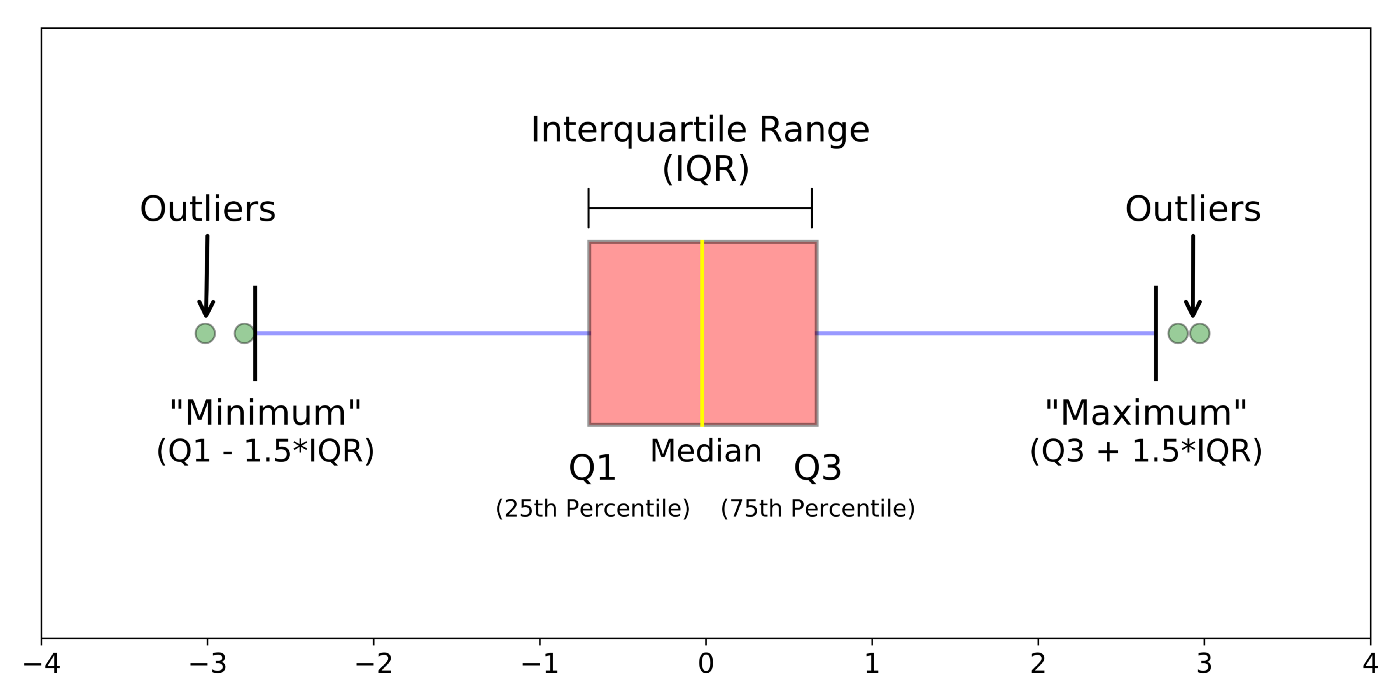

{'boxes': [<matplotlib.lines.Line2D at 0x7faa66074b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7faa64830b10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faa64836b50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7faa64836610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7faa64830090>,
  <matplotlib.lines.Line2D at 0x7faa648305d0>]}

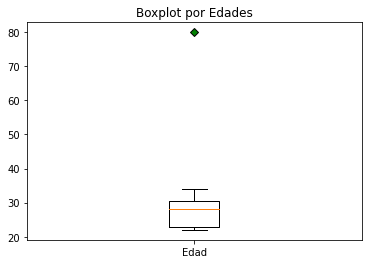

In [4]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Edades')
ax.boxplot(edades, flierprops=green_diamond, labels=["Edad"])

{'boxes': [<matplotlib.lines.Line2D at 0x7faa6481dd50>],
 'caps': [<matplotlib.lines.Line2D at 0x7faa64822d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faa6482bd90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7faa6482b850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7faa648222d0>,
  <matplotlib.lines.Line2D at 0x7faa64822810>]}

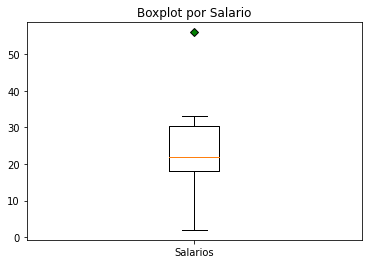

In [5]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Salario')
ax.boxplot(salario_anual_miles, flierprops=green_diamond, labels=["Salarios"])

{'boxes': [<matplotlib.lines.Line2D at 0x7faa647e1b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7faa660ede90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faa660e65d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7faa660c5990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7faa647c86d0>,
  <matplotlib.lines.Line2D at 0x7faa647c8a10>]}

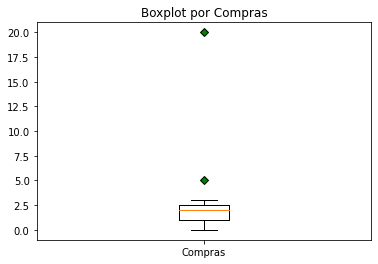

In [6]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Compras')
ax.boxplot(compras_mes, flierprops=green_diamond, labels=["Compras"])

In [7]:
!pip install pyod  # instala la librería para tratar con n dimenciones
from pyod.models.knn import KNN
import pandas as pd
 
X = pd.DataFrame(data={'edad':edades,'salario':salario_anual_miles, 'compras':compras_mes})
 
clf = KNN(contamination=0.18)
clf.fit(X)
y_pred = clf.predict(X)
X[y_pred == 1]

     |████████████████████████████████| 118 kB 8.7 MB/s 
  Created wheel for pyod: filename=pyod-1.0.0-py3-none-any.whl size=144471 sha256=b753e1581ae8115620228fbd9a7f81d92992fb5af340ead717bd518f5339ae09
  Stored in directory: /root/.cache/pip/wheels/37/e6/25/8098880dadf78bf063ee9b37477b1a9317e8bb0fc06e623187
Successfully built pyod


,edad,salario,compras
3,23,21,20
10,30,56,5
16,33,2,2
18,80,23,2


# Como los outlier afectan un modelo de ML
CON OUTLIERS: La línea de tendencia se mantiene plana sobre todo por el outlier de la edad(Grafico lado izquierdo)

SIN OUTLIERS: Al quitar los outliers la tendencia empieza a tener pendiente
(Grafico lado derecho)

Con esto nos podemos dar una idea de qué distinto podría resultar entrenar un modelo de Machine Learning con ó sin esas muestras anormales.


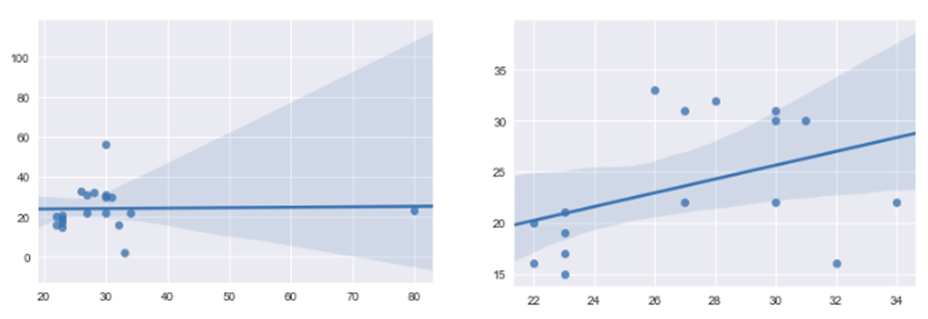



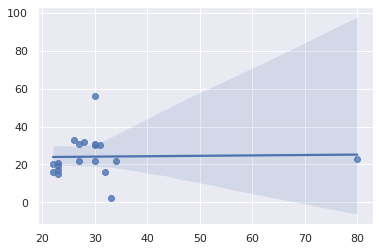

In [8]:
import seaborn as sns

#CON OUTLIERS

sns.set(color_codes=True)
sns.regplot(x=edades, y=salario_anual_miles)

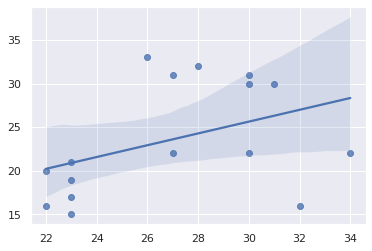

In [9]:
# SIN OUTLIERS

edades_fix=[]
salario_anual_miles_fix=[]

for index, x in enumerate(salario_anual_miles):
    y= edades[index]
    if abs(x-media) > std_x or abs(y-media_y) > std_y:
        pass
    else:
        edades_fix.append(y)
        salario_anual_miles_fix.append(x)
        
sns.regplot(x=np.array(edades_fix), y=np.array(salario_anual_miles_fix))